In this notebook we are implementing  dimensionality reduction techniques like PCA ,t-sne and UMAP on mnsit digit recognizer dataset and see how these dimensionality reduction techniques acts and compare it with each other by plotting 2d and 3d plots 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import pandas as pd
df= pd.read_csv("//kaggle/input/digit-recognizer/train.csv")
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
label = df['label']

data = df.drop('label',axis =1)


In [4]:
from sklearn.preprocessing import StandardScaler

standard_data = StandardScaler().fit_transform(data)

print(type(standard_data))
standard_data.shape

<class 'numpy.ndarray'>


(42000, 784)

In [5]:
cov_mat = np.matmul(standard_data.T ,standard_data)
cov_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)




In [7]:
pca_d = pca.fit_transform(standard_data)

pca_d.shape

(42000, 2)

In [8]:
pca_d = np.vstack((pca_d.T,label)).T
pca_d.shape

(42000, 3)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


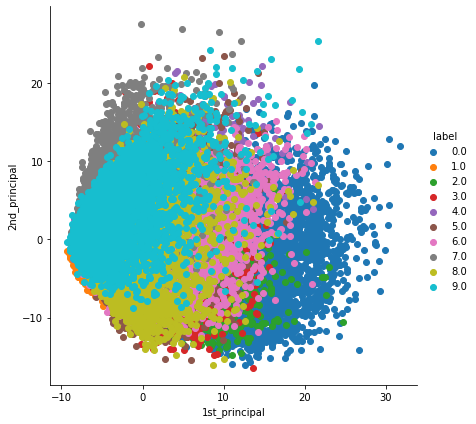

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
pca_df = pd.DataFrame(data=pca_d, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [11]:
pca_df

,1st_principal,2nd_principal,label
0,-5.140423,-5.226890,1.0
1,19.292244,6.034538,0.0
2,-7.644555,-1.705311,1.0
3,-0.474211,5.836112,4.0
4,26.559526,6.025790,0.0
...,...,...,...
41995,13.678835,-1.350757,0.0
41996,-8.869635,-1.186763,1.0
41997,0.495298,7.078056,7.0
41998,2.307148,-4.343293,6.0


PCA works well on large dataset verywell , but no clear seperation of data

# **Visualizing PCA in 3d plot**

In [12]:
pca2 = decomposition.PCA(n_components=3)

In [13]:
pca_3d = pca2.fit_transform(standard_data)

pca_3d

array([[ -5.14043628,  -5.22640685,   3.88673468],
       [ 19.29235376,   6.03340456,   1.30826721],
       [ -7.64451813,  -1.70539825,   2.28952024],
       ...,
       [  0.49542443,   7.07714363, -12.08968097],
       [  2.30723308,  -4.34487709,   0.70007752],
       [ -4.8076431 ,   1.55865209,  -2.49826704]])

In [14]:
pca_3d = np.vstack((pca_3d.T,label)).T
pca_3d.shape

(42000, 4)

In [15]:
pca_3df = pd.DataFrame(data=pca_3d, columns=("1st_principal", "2nd_principal","3rd_principal", "label"))
pca_3df

,1st_principal,2nd_principal,3rd_principal,label
0,-5.140436,-5.226407,3.886735,1.0
1,19.292354,6.033405,1.308267,0.0
2,-7.644518,-1.705398,2.289520,1.0
3,-0.474186,5.835717,2.008510,4.0
4,26.559591,6.025186,0.933123,0.0
...,...,...,...,...
41995,13.678858,-1.350457,-3.957412,0.0
41996,-8.869595,-1.187208,2.323303,1.0
41997,0.495424,7.077144,-12.089681,7.0
41998,2.307233,-4.344877,0.700078,6.0


In [16]:
import plotly.express as px

fig = px.scatter_3d(pca_3df, x='1st_principal', y='2nd_principal', z='3rd_principal',
              color='label')
fig.show()


In 3d we can visualize clearly but here data label not fully seperated 

In [17]:
standard_data.shape

(42000, 784)

# **t-SNE**

In [18]:
from sklearn.manifold import TSNE

standard_data2000 = standard_data[0:2000,:] 
print(standard_data2000.shape)
label2000 = label[0:2000]



(2000, 784)


In [19]:
mod = TSNE(n_components=2 ,random_state =0, perplexity=50,  n_iter=5000)
mod

TSNE(n_iter=5000, perplexity=50, random_state=0)

In [20]:
tsne = mod.fit_transform(standard_data2000)

In [21]:
tsne.shape

(2000, 2)

In [22]:
tsne1 = np.vstack((tsne.T ,label2000)).T
tsne1.shape

(2000, 3)

In [23]:
tsne_df = pd.DataFrame(data=tsne1,columns=('1st_comp','2nd_comp','label'))
tsne_df

,1st_comp,2nd_comp,label
0,-14.992762,34.939312,1.0
1,-29.543989,-36.067966,0.0
2,13.642333,28.300308,1.0
3,17.221928,-19.498236,4.0
4,-38.045002,-40.020603,0.0
...,...,...,...
1995,56.342052,-13.792185,7.0
1996,8.383704,19.242319,5.0
1997,-2.211525,-2.146799,5.0
1998,-9.626461,-8.936323,5.0


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



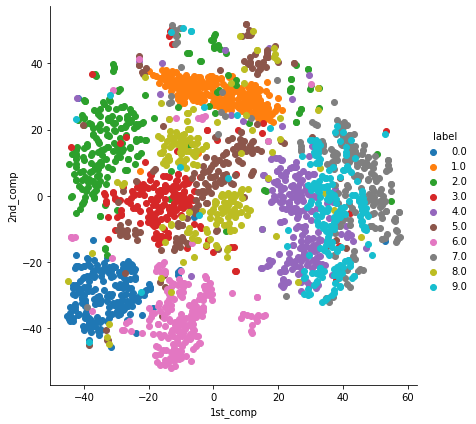

In [24]:
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, '1st_comp', '2nd_comp').add_legend()
plt.show()

Always in tsne try different value perplexity and iteration to get better results

From this plot above we can mostly differntiate different numbers 

# **3 dimension plot for tsne**

In [25]:
mod3 = TSNE(n_components=3 ,random_state =0)
mod3

TSNE(n_components=3, random_state=0)

In [26]:
tsne3 = mod3.fit_transform(standard_data2000)

In [27]:
tsne3 = np.vstack((tsne3.T ,label2000)).T
tsne3.shape

(2000, 4)

In [28]:
tsne3_df = pd.DataFrame(data=tsne3,columns=('1st_comp','2nd_comp','3rd_comp','label'))
tsne3_df

,1st_comp,2nd_comp,3rd_comp,label
0,0.151602,-4.358413,13.684875,1.0
1,-15.585891,3.623539,-14.199240,0.0
2,3.164584,10.165250,0.719800,1.0
3,16.341763,4.886915,14.207898,4.0
4,-17.901709,3.166258,-16.227062,0.0
...,...,...,...,...
1995,27.465765,-2.134732,2.674734,7.0
1996,-1.418644,-10.976446,4.717574,5.0
1997,4.912458,2.712795,-5.102944,5.0
1998,-4.841028,1.795436,-11.945816,5.0


In [29]:
import plotly.express as px
fig = px.scatter_3d(tsne3_df, x='1st_comp', y='2nd_comp', z='3rd_comp',
              color='label')
fig.show()


tsne is non-linear so it can capture the structure of trickier manifolds

# **UMAP**

In [30]:
from umap import UMAP

In [31]:
u_map = UMAP(n_neighbors=50, n_components=2, min_dist=0.1)

In [32]:
u_m = u_map.fit_transform(standard_data2000)

In [33]:
u_m.shape

(2000, 2)

In [34]:
u_m = np.vstack((u_m.T,label2000)).T

In [35]:
u_m.shape

(2000, 3)

In [36]:
umap_df = pd.DataFrame(data=u_m,columns=('1st_comp','2nd_comp','label'))
umap_df

,1st_comp,2nd_comp,label
0,7.095094,16.619223,1.0
1,3.418853,10.844635,0.0
2,4.263079,16.071936,1.0
3,8.818080,12.268692,4.0
4,3.567635,10.248232,0.0
...,...,...,...
1995,10.586194,13.370154,7.0
1996,5.937489,15.092126,5.0
1997,6.819516,13.103618,5.0
1998,5.999325,12.688479,5.0


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



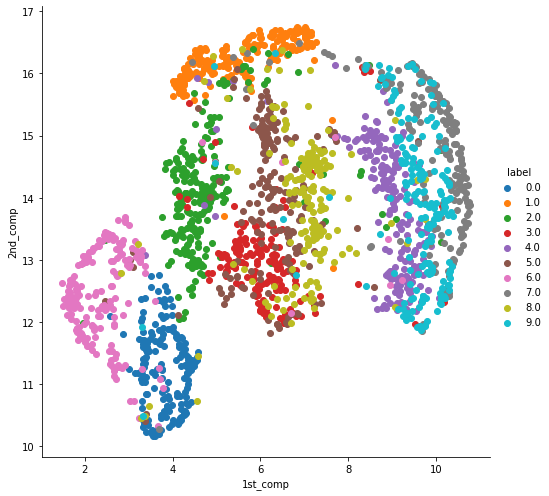

In [37]:
sns.FacetGrid(umap_df,hue='label',size=7).map(plt.scatter,'1st_comp','2nd_comp').add_legend()
plt.show()

In [38]:
u_map3 = UMAP(n_neighbors=15, n_components=3, min_dist=0.1)

In [39]:
u_m3 = u_map3.fit_transform(standard_data2000)

In [40]:
u_m3 = np.vstack((u_m3.T,label2000)).T

In [41]:
u_m3.shape

(2000, 4)

In [42]:
umap_df3 = pd.DataFrame(data=u_m3,columns=('1st_comp','2nd_comp','3rd_comp','label'))
umap_df3

,1st_comp,2nd_comp,3rd_comp,label
0,5.813234,7.504174,9.442666,1.0
1,0.800139,5.345640,5.514854,0.0
2,4.708648,4.253473,8.615803,1.0
3,7.723260,3.666212,7.060293,4.0
4,0.508685,5.308007,4.890731,0.0
...,...,...,...,...
1995,8.616064,3.497575,9.252299,7.0
1996,4.976838,7.749521,7.404166,5.0
1997,6.048182,6.143478,6.304388,5.0
1998,5.161989,6.118680,5.509478,5.0


In [43]:
fig = px.scatter_3d(umap_df3, x='1st_comp', y='2nd_comp', z='3rd_comp',
              color='label')
fig.show()

Here data is almost clearly seperable compared to other methods
so from these we can conclude that UMAP works in dimensionality reduction

It is clear that t-SNE and UMAP show a better separation of the classes compared to PCA

UMAP preseves global structure very well compared to tsne



Dimensionality reduction techniques are great for feature reduction and visualization of samples in low dimensions.
When we use the results of a low-dimensional space for decision-making, we should always be aware that a map is merely a projection of a higher complex dimensional space.